## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import plotly.express as px
import plotly.io as pio
from geopy.geocoders import Nominatim

## Loading data and settings

### Loading Data

In [2]:
df = pd.read_csv('/home/cudok/Загрузки/International Study on Male Genital Measurements Dataset.csv', delimiter=',', encoding='cp1252')

### Loading settings

In [3]:
pd.set_option('display.float_format', '{:.6f}'.format)
sns.set(style="whitegrid", rc={'figure.figsize': (14, 8), 'figure.dpi': 100})
warnings.filterwarnings("ignore", category=FutureWarning)
pio.renderers.default = 'notebook'

## Primary analysis

### Check for duplicates

In [4]:
df.shape

(139, 13)

In [5]:
df = df.drop_duplicates()
df.shape

(139, 13)

---
**Conclusion:**

There are no duplicates.

---

### Let's display brief information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     139 non-null    object 
 1   Region                      139 non-null    object 
 2   Flaccid Length (cm)         139 non-null    float64
 3   Erect Length (cm)           139 non-null    float64
 4   Flaccid Circumference (cm)  139 non-null    float64
 5   Erect Circumference (cm)    139 non-null    float64
 6   Flaccid Volume (cm³)        139 non-null    float64
 7   Erect Volume (cm³)          139 non-null    float64
 8   Growth Length               139 non-null    float64
 9   Growth Circumference        139 non-null    float64
 10  Growth Volume               139 non-null    float64
 11  N                           139 non-null    int64  
 12  Method                      139 non-null    object 
dtypes: float64(9), int64(1), object(3)


### Let's build a heat map of missing values

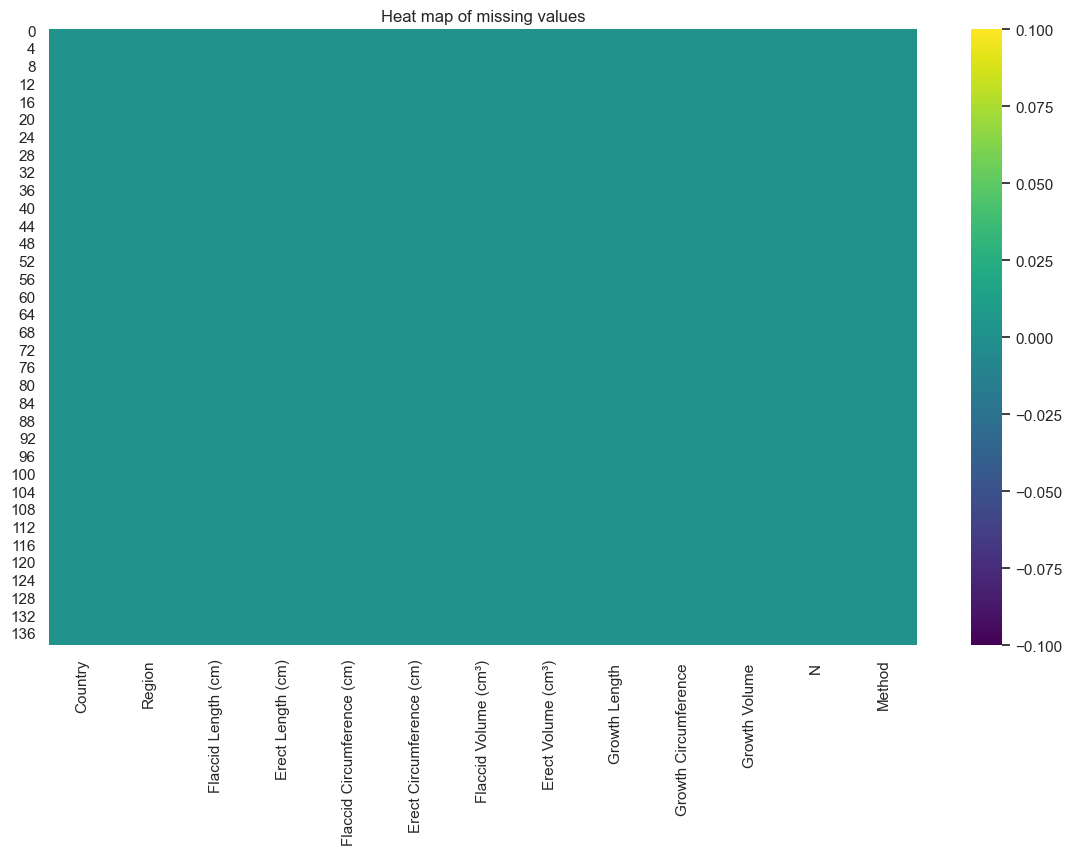

In [7]:
sns.heatmap(df.isna(), cmap='viridis')
plt.title("Heat map of missing values")
plt.show()

---
**Conclusion:**

There are no missing values ​​observed.

---

### Let's display the first 5 values.

In [8]:
df.head()

,Country,Region,Flaccid Length (cm),Erect Length (cm),Flaccid Circumference (cm),Erect Circumference (cm),Flaccid Volume (cm³),Erect Volume (cm³),Growth Length,Growth Circumference,Growth Volume,N,Method
0,Afghanistan,Central Asia,9.500000,13.690000,9.100000,11.420000,62.600000,142.080000,1.441053,1.254945,2.269649,100,Measured
1,Albania,Europe,9.800000,14.190000,9.700000,12.160000,73.380000,166.970000,1.447959,1.253608,2.275416,95,Self reported
2,Algeria,Africa,9.900000,14.490000,8.900000,10.970000,62.400000,138.760000,1.463636,1.232584,2.223718,738,Self reported
3,Angola,Africa,10.000000,15.730000,9.600000,11.820000,73.340000,174.890000,1.573000,1.231250,2.384647,978,Measured
4,Argentina,South America,9.400000,14.880000,8.900000,11.450000,59.250000,155.240000,1.582979,1.286517,2.620084,1669,Self reported


### Let's display the last 5 values.

In [9]:
df.tail()

,Country,Region,Flaccid Length (cm),Erect Length (cm),Flaccid Circumference (cm),Erect Circumference (cm),Flaccid Volume (cm³),Erect Volume (cm³),Growth Length,Growth Circumference,Growth Volume,N,Method
134,Uruguay,South America,9.200000,14.670000,9.800000,12.570000,70.310000,184.460000,1.594565,1.282653,2.623524,861,Self reported
135,Uzbekistan,Western Asia,9.100000,13.430000,9.200000,11.920000,61.290000,151.850000,1.475824,1.295652,2.477566,236,Measured
136,Venezuela,South America,10.600000,16.930000,10.200000,13.030000,87.760000,228.740000,1.597170,1.277451,2.606427,4610,Measured
137,Vietnam,Southeast Asia,7.400000,10.150000,8.900000,11.550000,46.640000,107.750000,1.371622,1.297753,2.310249,365,Measured
138,Yemen,Western Asia,8.600000,12.700000,8.400000,10.890000,48.290000,119.850000,1.476744,1.296429,2.481880,70,Measured


### Let's display descriptive statistics.

In [10]:
df.describe(exclude='object').drop('count').T

,mean,std,min,25%,50%,75%,max
Flaccid Length (cm),9.504317,1.091659,6.900000,8.800000,9.500000,10.000000,12.200000
Erect Length (cm),13.856259,1.782799,9.430000,12.860000,13.980000,15.070000,17.950000
Flaccid Circumference (cm),9.385612,0.627690,8.100000,8.900000,9.300000,9.800000,10.900000
Erect Circumference (cm),11.841079,0.725479,10.250000,11.320000,11.730000,12.280000,13.630000
Flaccid Volume (cm³),67.492446,14.913607,38.740000,56.355000,65.390000,77.665000,108.190000
Erect Volume (cm³),156.600360,35.191536,88.020000,132.160000,152.750000,177.245000,252.850000
Growth Length,1.457568,0.086515,1.248214,1.439130,1.466265,1.476139,1.597826
Growth Circumference,1.262262,0.022009,1.231132,1.248156,1.254737,1.273971,1.362791
Growth Volume,2.323068,0.159673,1.951904,2.273743,2.313511,2.415869,2.639443
N,690.913669,1022.290540,50.000000,166.500000,380.000000,827.500000,8976.000000


In [11]:
df.describe(include='object').drop('count').T

,unique,top,freq
Country,139,Afghanistan,1
Region,12,Europe,40
Method,2,Measured,88


## Exploratory Data Analysis (EDA)

### Percentage distribution of regions

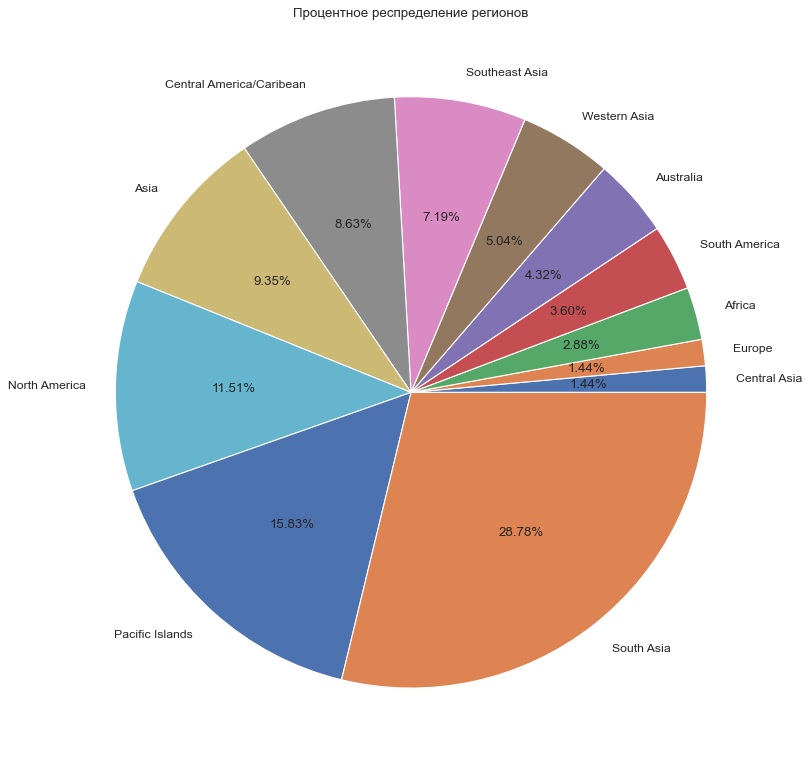

In [12]:
plt.figure(figsize=(12, 12), dpi=80)
plt.pie(df['Region'].value_counts().sort_values(ascending=True), labels=df['Region'].unique(), autopct='%1.2f%%')
plt.title("Процентное респределение регионов")
plt.show()

### Percentage distribution of measurement methods

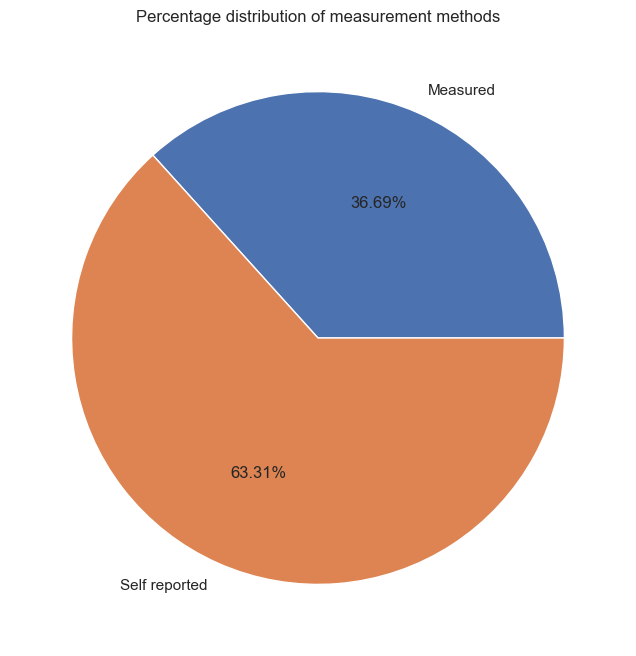

In [13]:
plt.figure(figsize=(10, 8))
plt.pie(df['Method'].value_counts().sort_values(ascending=True), labels=df['Method'].unique(), autopct='%1.2f%%')
plt.title("Percentage distribution of measurement methods")
plt.show()

### Banana length distribution

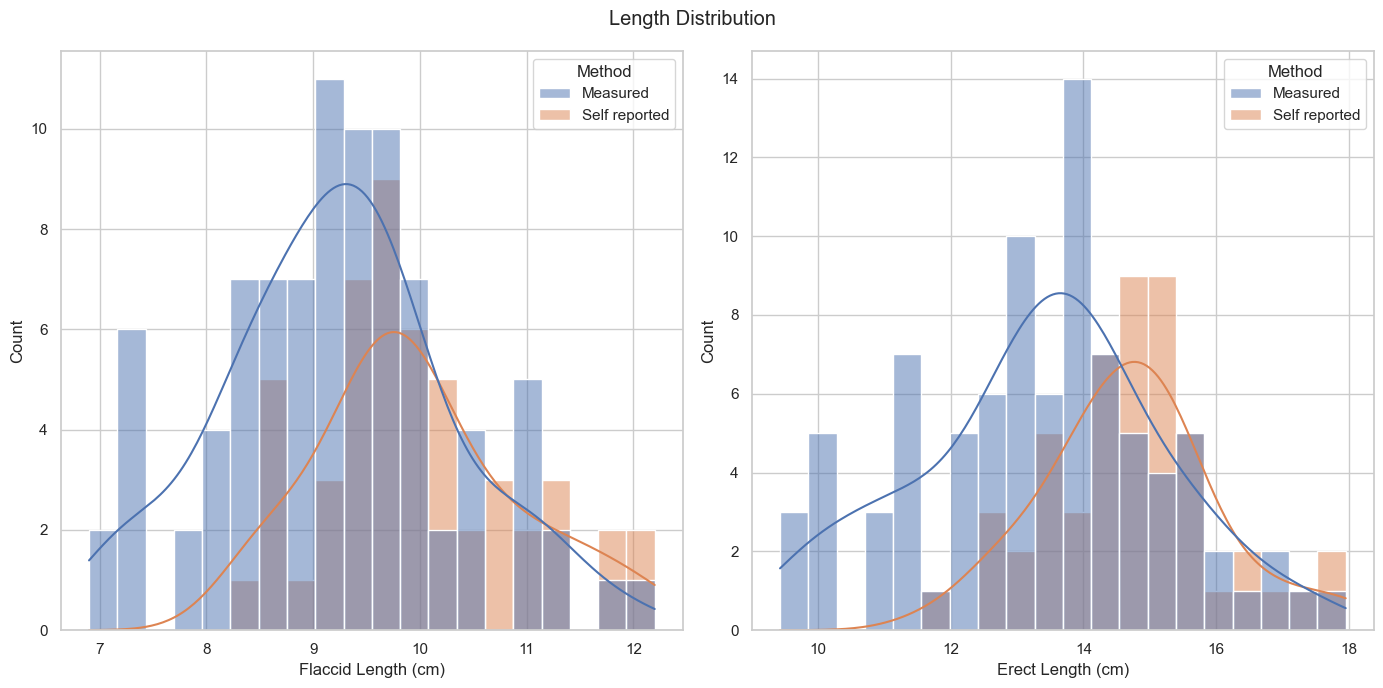

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), tight_layout=True)

sns.histplot(data=df, x='Flaccid Length (cm)', kde=True, bins=20, hue='Method', ax=axes[0])
sns.histplot(data=df, x='Erect Length (cm)', kde=True, bins=20, hue='Method',ax=axes[1])

plt.suptitle("Length Distribution")
plt.show()

### Banana Circumference Distribution

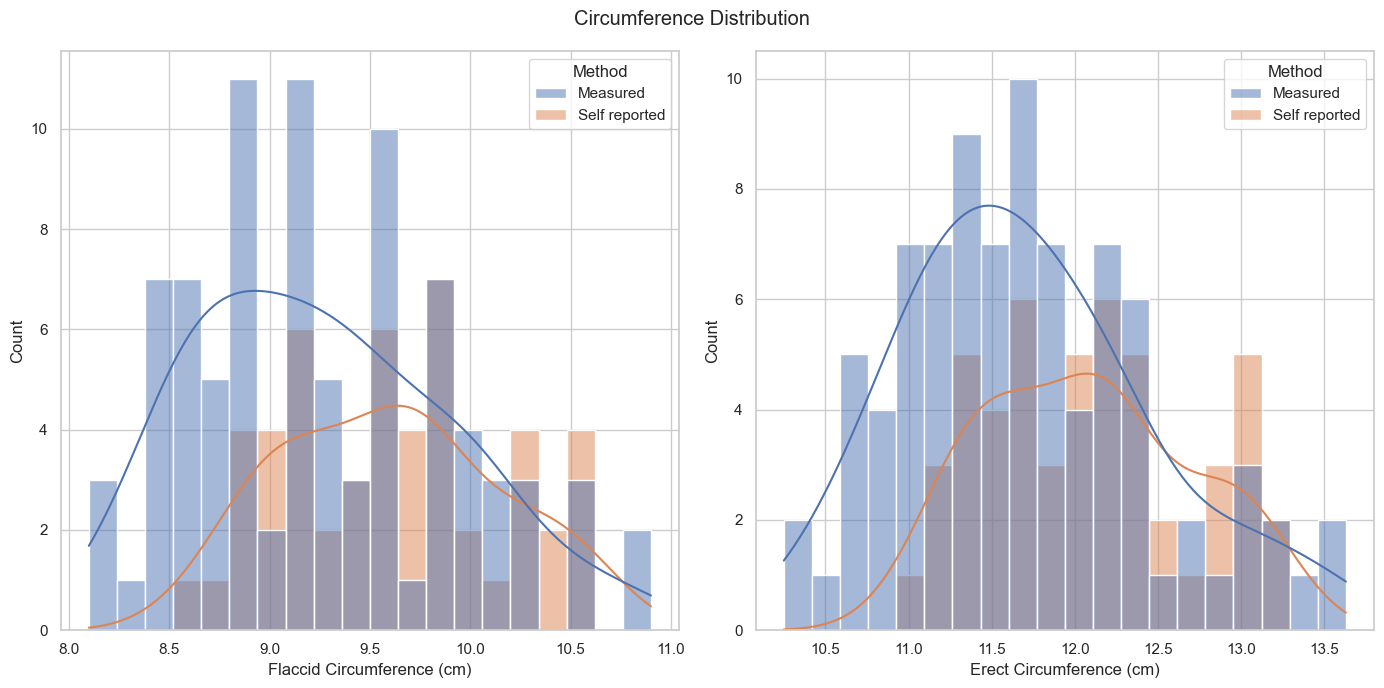

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), tight_layout=True)

sns.histplot(data=df, x='Flaccid Circumference (cm)', kde=True, bins=20, hue='Method', ax=axes[0])
sns.histplot(data=df, x='Erect Circumference (cm)', kde=True, bins=20, hue='Method', ax=axes[1])

plt.suptitle("Circumference Distribution")
plt.show()

### Banana volume distribution

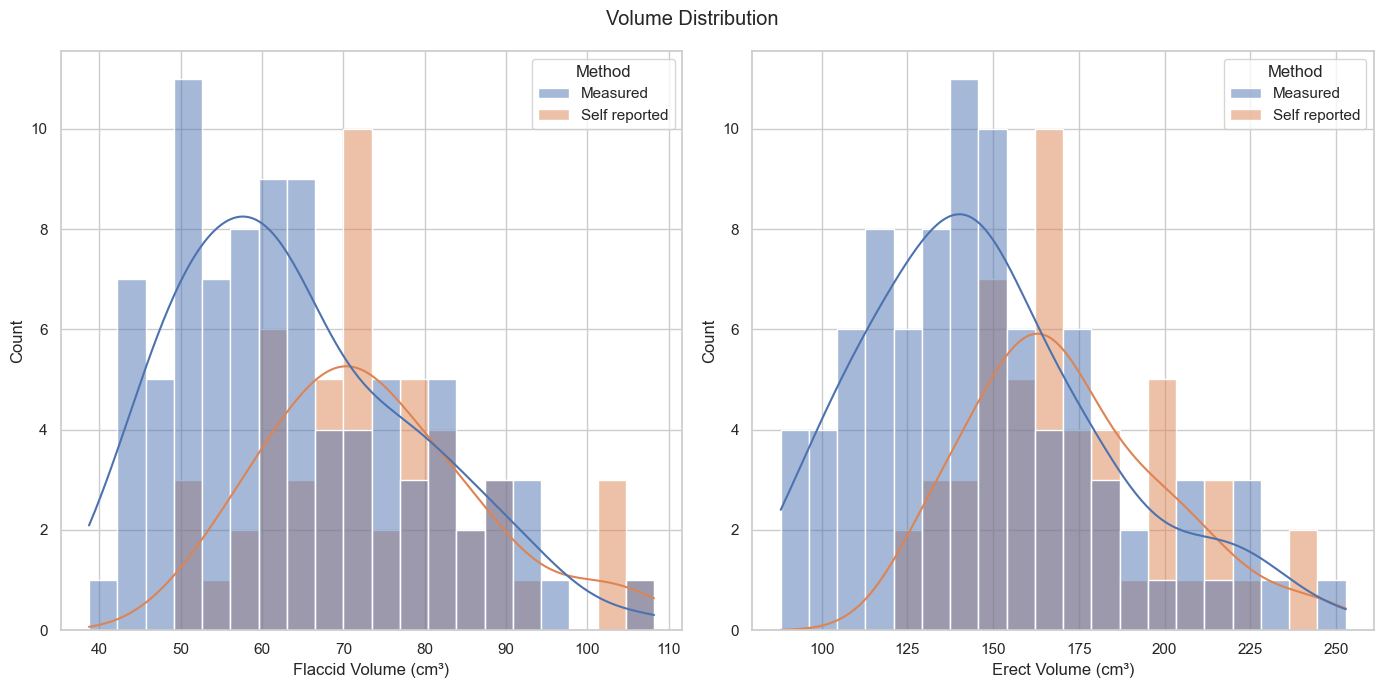

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), tight_layout=True)

sns.histplot(data=df, x='Flaccid Volume (cm³)', kde=True, bins=20, hue='Method', ax=axes[0])
sns.histplot(data=df, x='Erect Volume (cm³)', kde=True, bins=20, hue='Method', ax=axes[1])

plt.suptitle("Volume Distribution")
plt.show()

### Size growth distribution

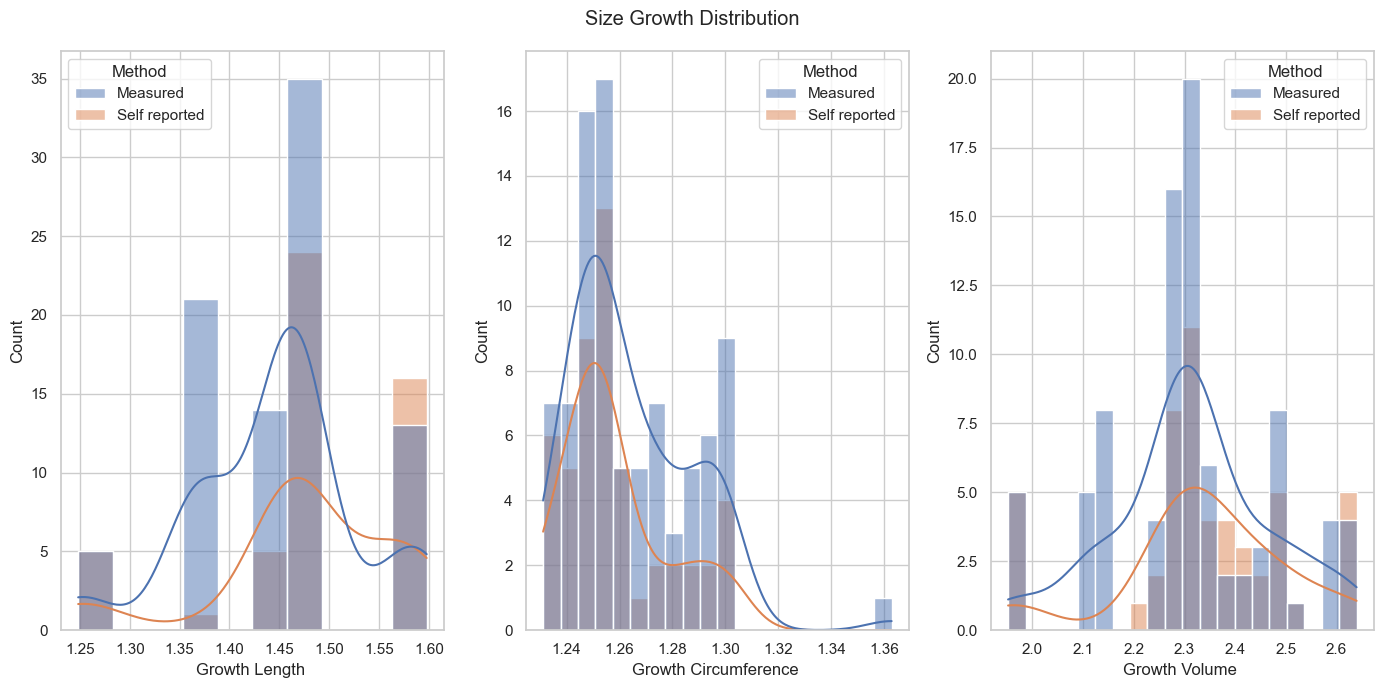

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 7), tight_layout=True)

sns.histplot(data=df, x='Growth Length ', kde=True, bins=10, hue='Method', ax=axes[0])
sns.histplot(data=df, x='Growth Circumference ', kde=True, bins=20, hue='Method', ax=axes[1])
sns.histplot(data=df, x='Growth Volume ', kde=True, bins=20, hue='Method', ax=axes[2])

plt.suptitle("Size Growth Distribution")
plt.show()

### Influence of feature variables on each other

#### Scatter plot

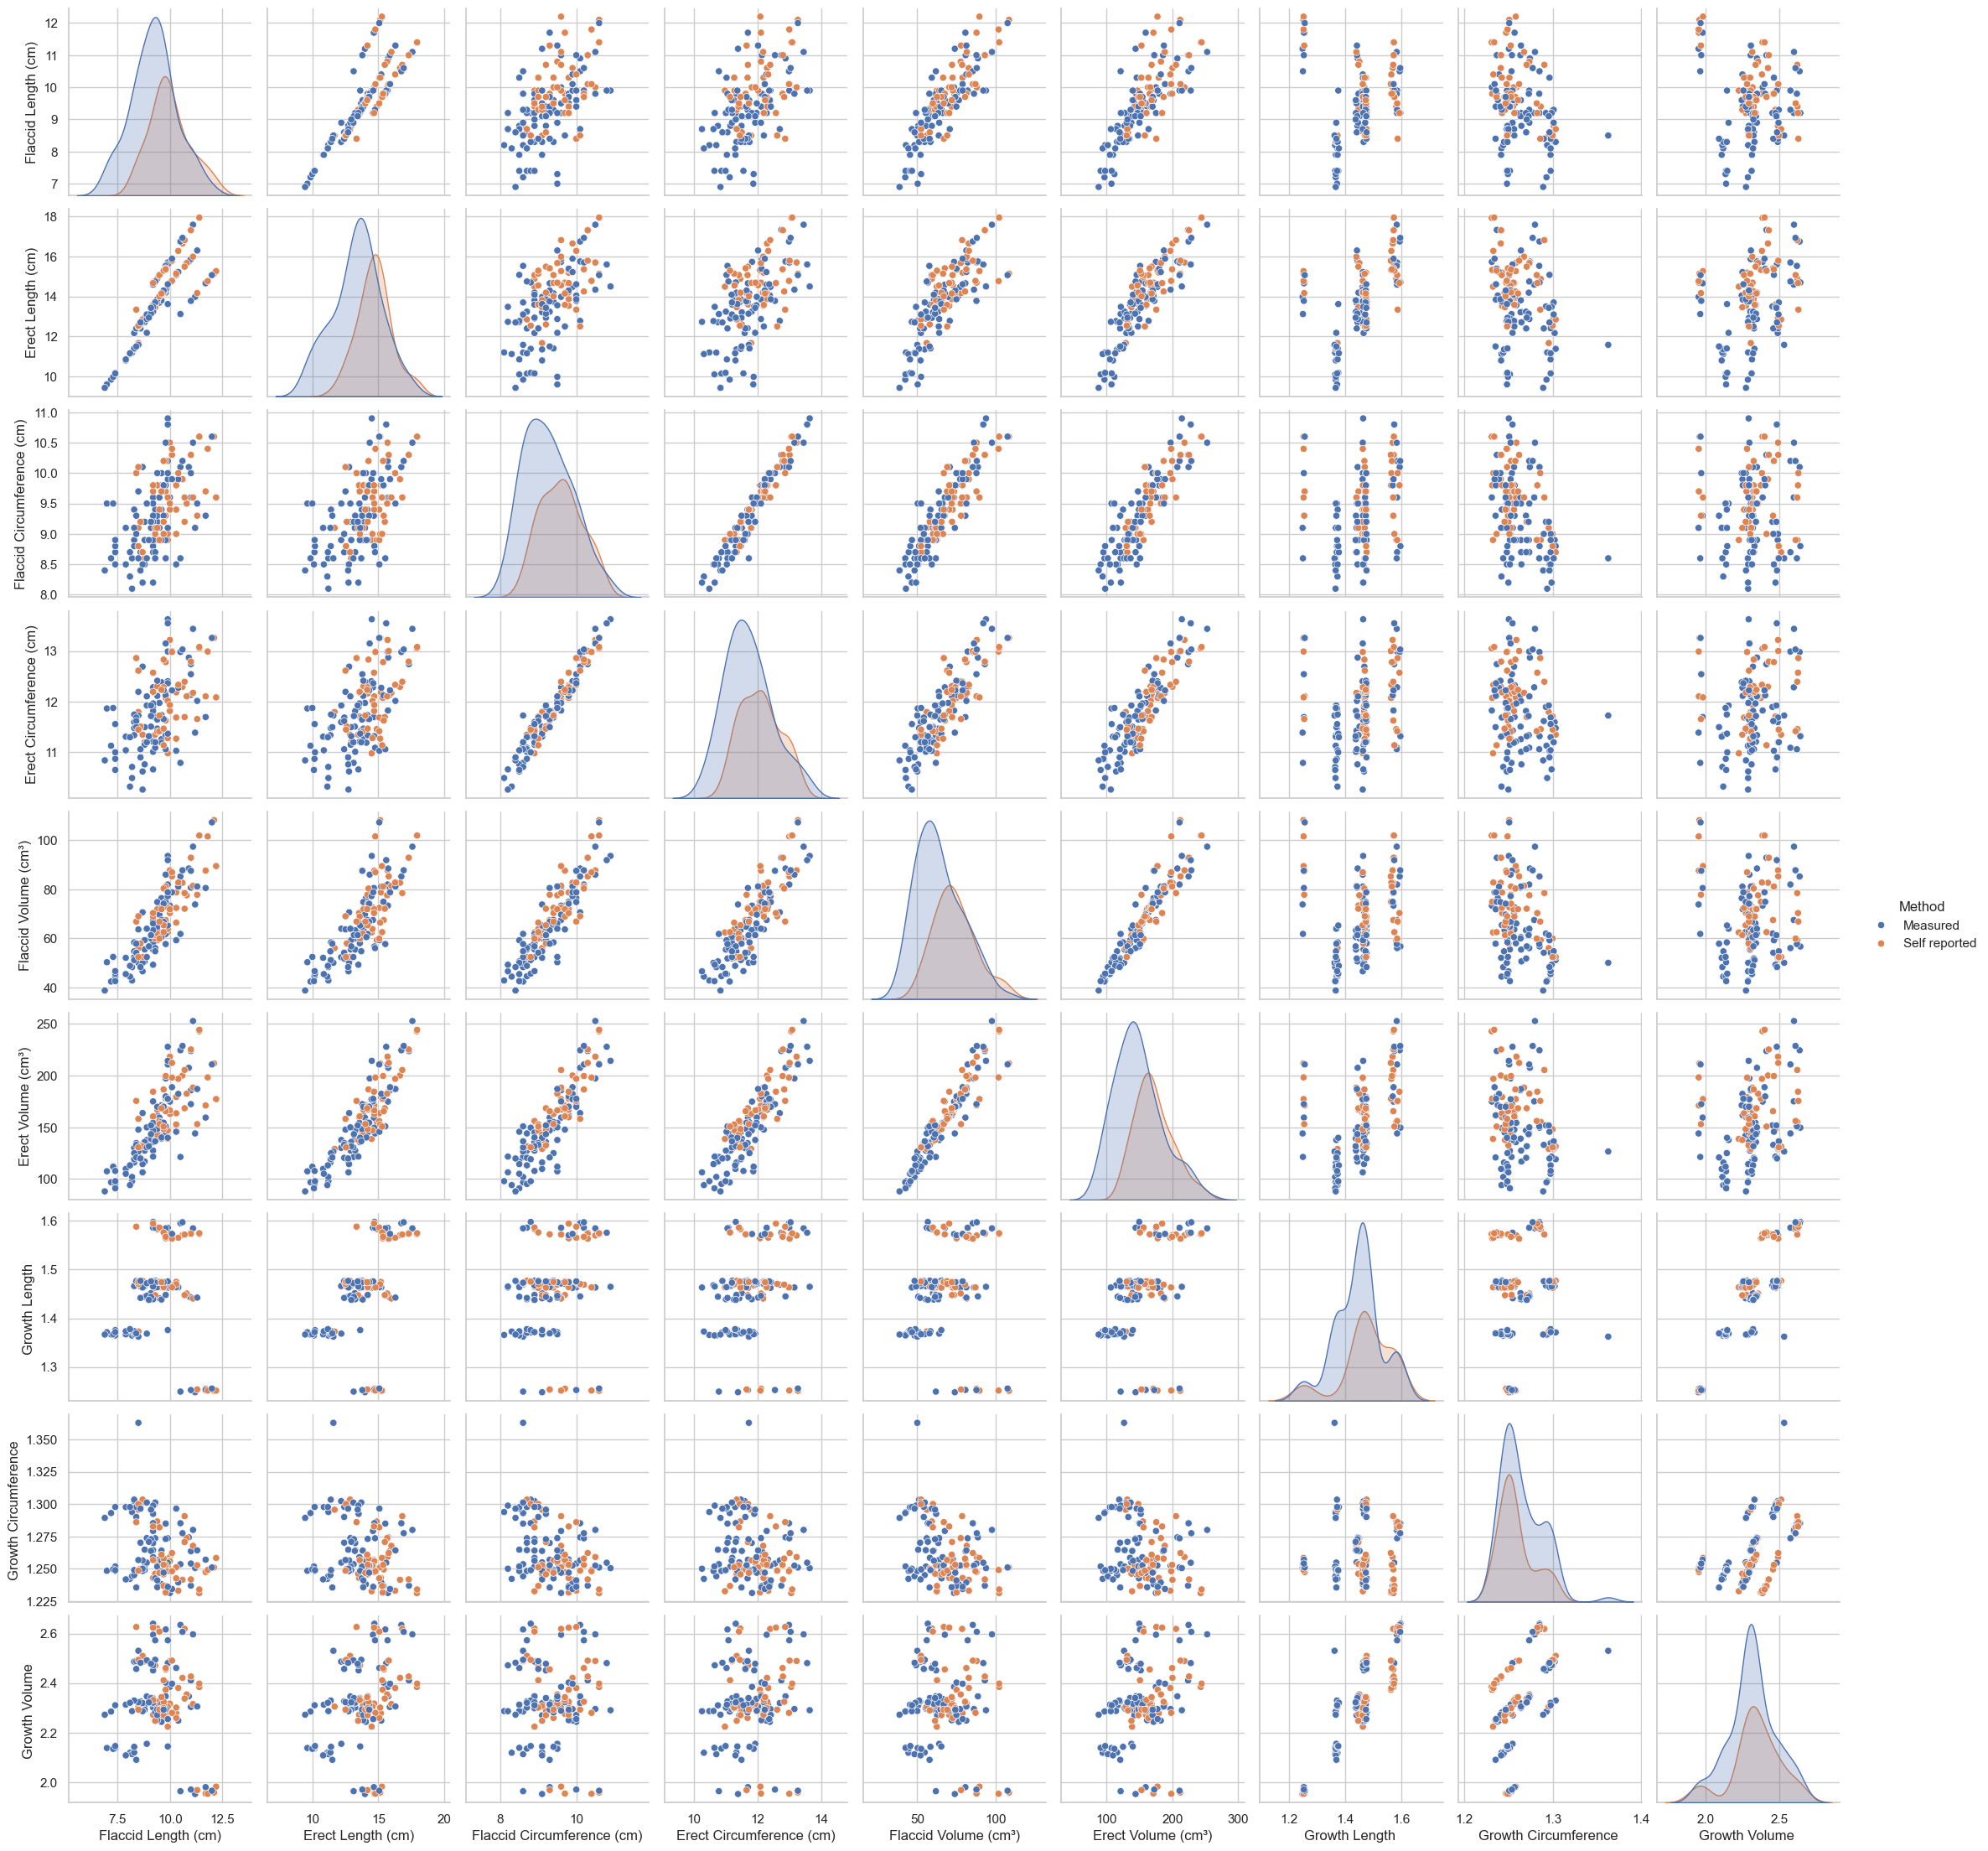

In [18]:
sns.pairplot(data=df.drop('N ', axis=1), diag_kind='kde', hue='Method')
plt.show()

#### Correlation Heat Map

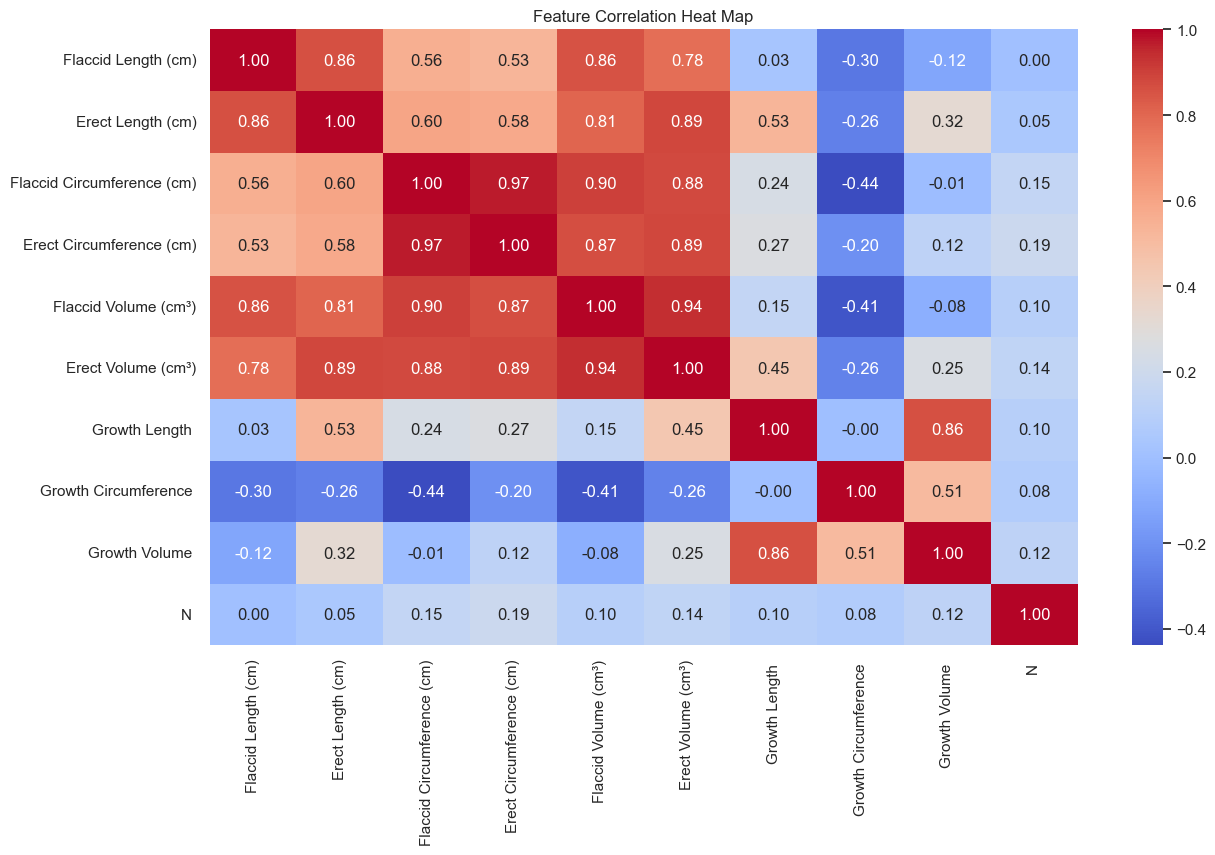

In [19]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heat Map')
plt.show()

### Distribution of samples by region

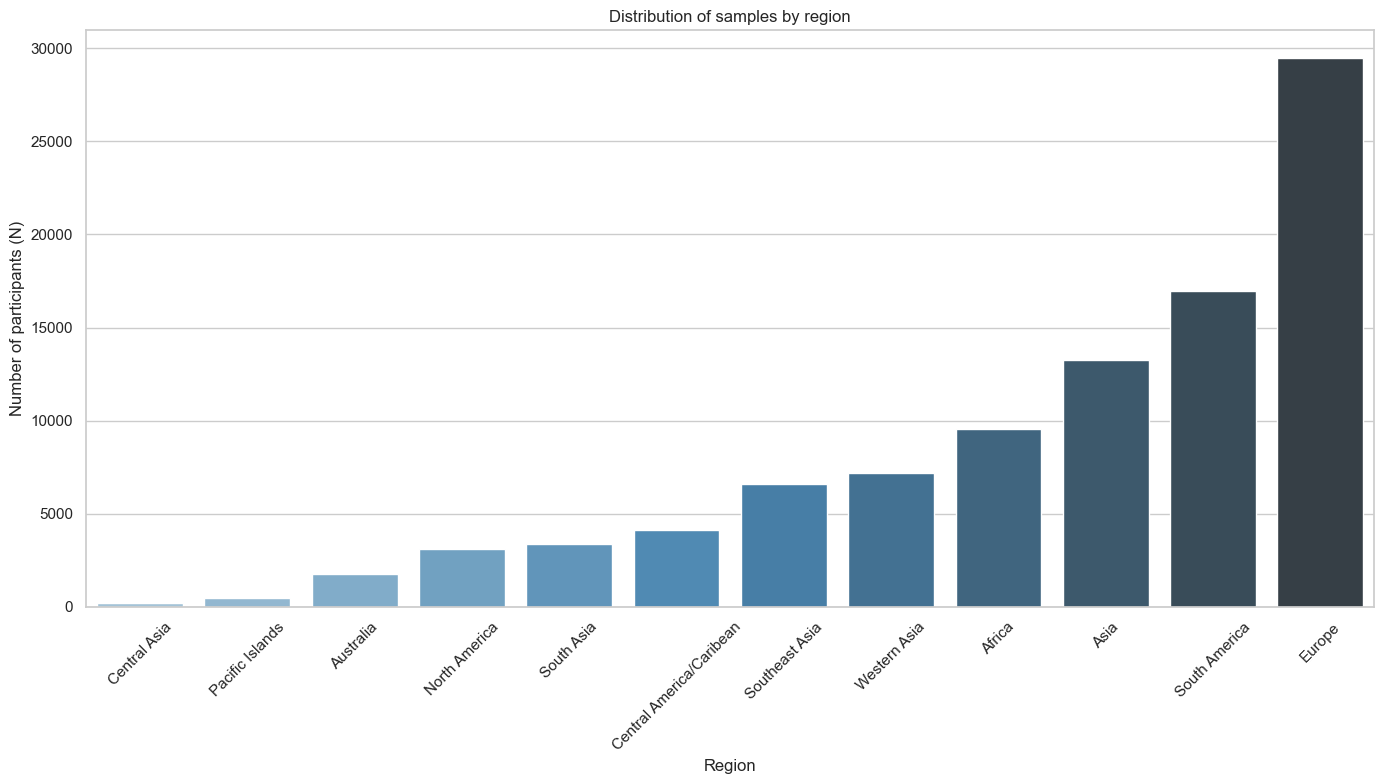

In [20]:
sns.barplot(data=pd.DataFrame(df.groupby(by='Region')['N '].sum()).sort_values(by='N '), x='Region', y='N ', palette='Blues_d')
plt.ylabel('Number of participants (N)')
plt.title('Distribution of samples by region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Visualization of erect banana lengths on a map

#### Preparing for Visualization

In [21]:
def get_coordinates(country):
    try:
        location = geolocator.geocode(country)

        return location.latitude, location.longitude

    except AttributeError:
        print(country)

        return None, None

    except TimeoutError:
        time.sleep(5)


geolocator = Nominatim(user_agent="Stiven")
df["Latitude"], df["Longitude"] = zip(*df["Country"].apply(get_coordinates))

Central African Rep.
Korea, Rep.
Macedonia, FYR


In [22]:
df[df['Latitude'].isna()]

,Country,Region,Flaccid Length (cm),Erect Length (cm),Flaccid Circumference (cm),Erect Circumference (cm),Flaccid Volume (cm³),Erect Volume (cm³),Growth Length,Growth Circumference,Growth Volume,N,Method,Latitude,Longitude
23,Central African Rep.,Africa,9.800000,15.330000,9.800000,12.070000,74.900000,177.720000,1.564286,1.231633,2.372764,59,Self reported,NaN,NaN
73,"Korea, Rep.",Asia,7.900000,10.800000,9.100000,11.300000,52.060000,109.740000,1.367089,1.241758,2.107952,878,Measured,NaN,NaN
81,"Macedonia, FYR",Europe,9.500000,13.980000,9.600000,11.970000,69.670000,159.400000,1.471579,1.246875,2.287929,230,Measured,NaN,NaN


In [23]:
country_rename = {
    'Central African Rep.': 'Central African Republic',
    'Korea, Rep.': 'Republic of Korea',
    'Macedonia, FYR': 'North Macedonia'
}
df['Country'] = df['Country'].replace(country_rename)

In [24]:
coordinates = [get_coordinates(i) for i in country_rename.values()]

df.loc[23, ['Latitude', 'Longitude']] = coordinates[0]
df.loc[73, ['Latitude', 'Longitude']] = coordinates[1]
df.loc[81, ['Latitude', 'Longitude']] = coordinates[2]

In [25]:
df[df['Latitude'].isna()]

,Country,Region,Flaccid Length (cm),Erect Length (cm),Flaccid Circumference (cm),Erect Circumference (cm),Flaccid Volume (cm³),Erect Volume (cm³),Growth Length,Growth Circumference,Growth Volume,N,Method,Latitude,Longitude


#### Heat interactive map with dimensions by country

In [28]:
fig = px.choropleth(
    df,
    locations="Country",
    locationmode='country names',
    color="Erect Length (cm)",
    title="Choropleth Map of Erect Length by Country",
    projection="natural earth"
)

fig.update_layout(
    height=600,
    width=1000,
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    title={
        'text': "Erect Length by Country",
        'y': 0.975,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(
        size=30,
        family='Arial Black'
    ),
    coloraxis_colorbar=dict(
        title="Erect Length (cm)",
        len=0.7,
        titleside='right'
    )
)

fig.show()
fig.write_html("/home/cudok/Загрузки/graph.html")
# ГРАФИК СМОТРЕТЬ В graph.html

### Top 10 Erect Bananas by country

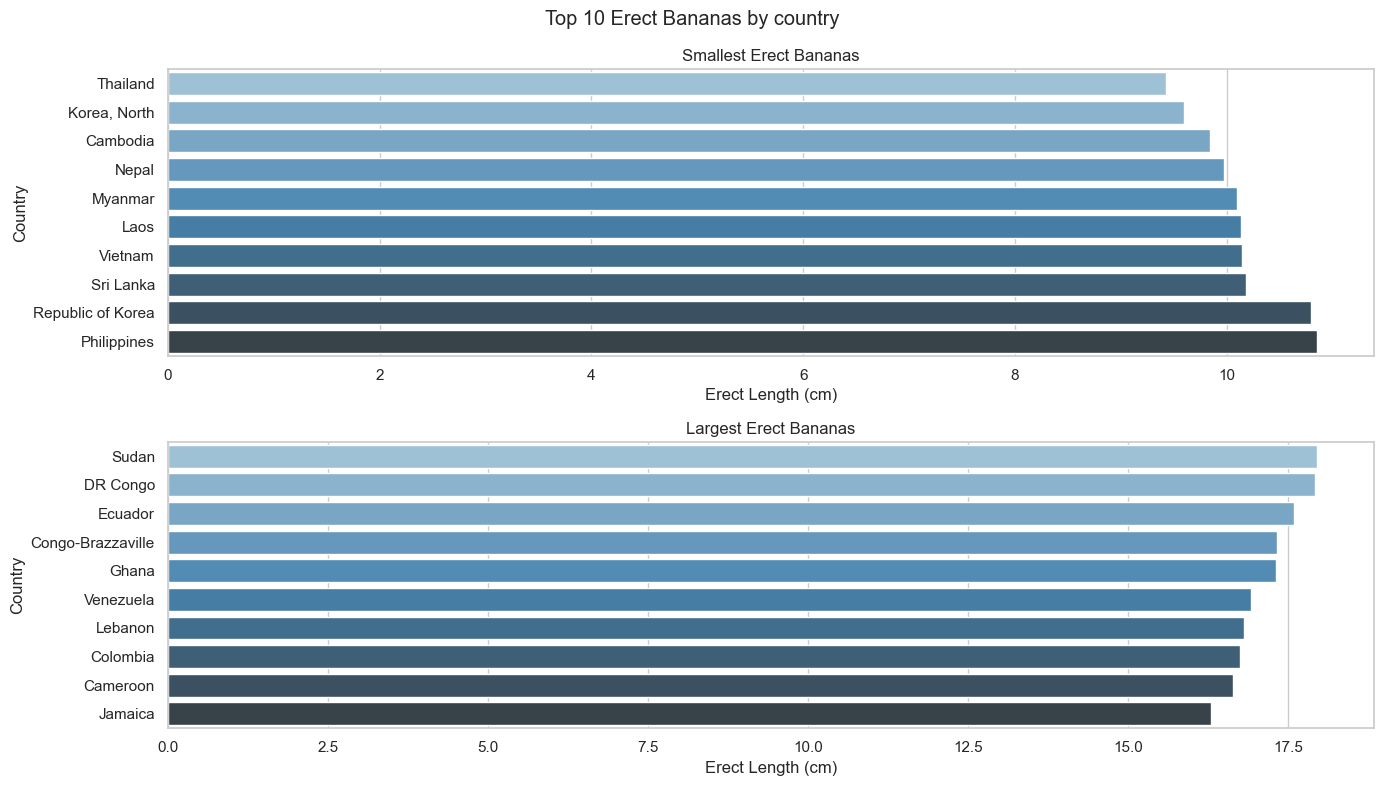

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, tight_layout=True)

sns.barplot(data=df.nsmallest(10, columns='Erect Length (cm)'), y='Country', x='Erect Length (cm)', palette='Blues_d', ax=axes[0])
axes[0].set_title('Smallest Erect Bananas')

sns.barplot(data=df.nlargest(10, columns='Erect Length (cm)'), y='Country', x='Erect Length (cm)', palette='Blues_d', ax=axes[1])
axes[1].set_title('Largest Erect Bananas')

plt.suptitle("Top 10 Erect Bananas by country")
plt.show()